# 1.)Check eligibility of the Customer given the inputs described above.(Classification)


# Read Data

In [1]:
import pandas as pd
from warnings import filterwarnings 
filterwarnings("ignore")

A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Loan_project/training_set.csv")
B=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Loan_project/testing_set.csv")


In [2]:
A

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


# Missing Data Treatment

In [3]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
B.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [5]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
from Wd8pm import replacer
replacer(A)

# Outliers

In [7]:
from Wd8pm import OL
outlier=OL(A)

In [8]:
outlier

[9,
 14,
 68,
 94,
 126,
 130,
 133,
 155,
 171,
 177,
 183,
 185,
 242,
 262,
 278,
 308,
 313,
 333,
 369,
 402,
 409,
 417,
 432,
 443,
 487,
 495,
 497,
 506,
 523,
 525,
 546,
 561,
 575,
 581,
 585,
 600,
 604]

In [9]:
A=A.drop(index=outlier,axis=0)

In [10]:
A.shape

(577, 13)

In [11]:
A.index=range(0,577)

# for test data Fill mean from A

In [12]:
x = A['Gender'].mode()[0]
B['Gender'] = B['Gender'].fillna(x)
x

'Male'

In [13]:
x = A['Dependents'].mode()[0]
B['Dependents'] = B['Dependents'].fillna(x)
x

'0'

In [14]:
x = A['Self_Employed'].mode()[0]
B['Self_Employed'] = B['Self_Employed'].fillna(x)
x

'No'

In [15]:
x = round(A['LoanAmount'].mean(),2)
B['LoanAmount'] = B['LoanAmount'].fillna(x)
x

136.05

In [16]:
x = round(A['Loan_Amount_Term'].mean(),2)
B['Loan_Amount_Term'] = B['Loan_Amount_Term'].fillna(x)

In [17]:
x =A['Credit_History'].mode()[0]
B['Credit_History']= B['Credit_History'].fillna(x)

In [18]:
A.isna().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
B.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Unique values

In [20]:
A.nunique()

Loan_ID              577
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      474
CoapplicantIncome    274
LoanAmount           185
Loan_Amount_Term       6
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [21]:
B.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           145
Loan_Amount_Term      13
Credit_History         2
Property_Area          3
dtype: int64

# Outliers removal

In [22]:
from Wd8pm import OL
out = OL(A)

In [23]:
A = A.drop(index=out,axis=0)

In [24]:
A.shape

(505, 13)

In [25]:
A.index=range(0,505)

# Bivariate Analysis

In [26]:
Y= A["Loan_Status"]
X=A.drop(labels=["Loan_Status","Loan_ID"],axis=1)
Xb=B.drop(labels=["Loan_ID"],axis=1)

# NeuralNetworks

In [27]:
Y= A[["Loan_Status"]]
X=A.drop(labels=["Loan_Status","Loan_ID"],axis=1)
Xb=B.drop(labels=["Loan_ID"],axis=1)

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ynew = pd.DataFrame(le.fit_transform(Y.Loan_Status),columns=["Loan_Status"])

In [29]:
from Wd8pm import catcon
cat,con=catcon(X)

In [30]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

X1b = pd.DataFrame(mm.transform(Xb[con]),columns=con)
X2b = pd.get_dummies(Xb[cat])
Xnewb = X1b.join(X2b)

# Splitting

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Ynew,test_size=0.2,random_state=21)

In [32]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [33]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1,activation="sigmoid"))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="binary_crossentropy",metrics="accuracy")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
13/13 [==============================] - 1s 21ms/step - loss: 0.7036 - accuracy: 0.6559 - val_loss: 0.4969 - val_accuracy: 0.8218
Epoch 2/250
13/13 [==============================] - 0s 4ms/step - loss: 0.5308 - accuracy: 0.7698 - val_loss: 0.4335 - val_accuracy: 0.8515
Epoch 3/250
13/13 [==============================] - 0s 4ms/step - loss: 0.5316 - accuracy: 0.7822 - val_loss: 0.4622 - val_accuracy: 0.8515
Epoch 4/250
13/13 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.7822 - val_loss: 0.5417 - val_accuracy: 0.6733
Epoch 5/250
13/13 [==============================] - 0s 5ms/step - loss: 0.5199 - accuracy: 0.7723 - val_loss: 0.4480 - val_accuracy: 0.8515
Epoch 6/250
13/13 [==============================] - 0s 5ms/step - loss: 0.4898 - accuracy: 0.7871 - val_loss: 0.4618 - val_accuracy: 0.8119
Epoch 7/250
13/13 [==============================] - 0s 5ms/step - loss: 0.5038 - accuracy: 0.7946 - val_loss: 0.4451 - val_accuracy: 0.8515
Epoch 8/250


In [34]:
tr = model.history['accuracy']
ts = model.history['val_accuracy']

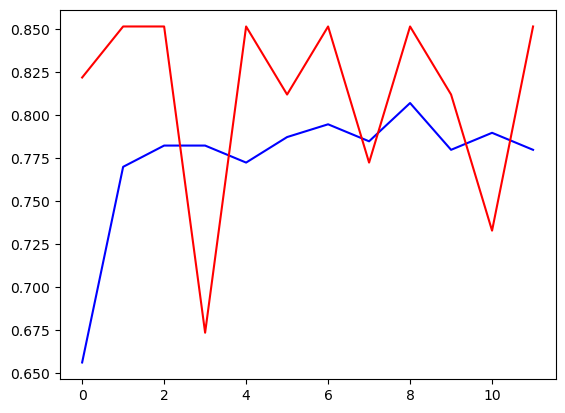

In [35]:
import matplotlib.pyplot as plt
plt.plot(tr,c="blue")
plt.plot(ts,c="red")


# Training using Entire data

In [36]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1,activation="sigmoid"))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="binary_crossentropy",metrics="accuracy")
model = nn.fit(Xnew,Ynew,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
16/16 [==============================] - 1s 14ms/step - loss: 0.5887 - accuracy: 0.7267 - val_loss: 0.4383 - val_accuracy: 0.8416
Epoch 2/250
16/16 [==============================] - 0s 4ms/step - loss: 0.4968 - accuracy: 0.7881 - val_loss: 0.4567 - val_accuracy: 0.8416
Epoch 3/250
16/16 [==============================] - 0s 4ms/step - loss: 0.5169 - accuracy: 0.7881 - val_loss: 0.4191 - val_accuracy: 0.8515
Epoch 4/250
16/16 [==============================] - 0s 4ms/step - loss: 0.4798 - accuracy: 0.7960 - val_loss: 0.4121 - val_accuracy: 0.8515
Epoch 5/250
16/16 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.7921 - val_loss: 0.4103 - val_accuracy: 0.8515
Epoch 6/250
16/16 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.8119 - val_loss: 0.4645 - val_accuracy: 0.7822
Epoch 7/250
16/16 [==============================] - 0s 4ms/step - loss: 0.4722 - accuracy: 0.7980 - val_loss: 0.5097 - val_accuracy: 0.7723
Epoch 8/250


# Predict

In [37]:
final_DF = Xnewb[Xnew.columns]
pred = nn.predict(final_DF)


12/12 [==============================] - 0s 867us/step


In [38]:

pred

array([[0.79261184],
       [0.8139574 ],
       [0.8521831 ],
       [0.90325284],
       [0.71843666],
       [0.8070453 ],
       [0.826096  ],
       [0.0464076 ],
       [0.8251747 ],
       [0.88740844],
       [0.71438235],
       [0.90025175],
       [0.92707676],
       [0.10680095],
       [0.8599392 ],
       [0.6949962 ],
       [0.8792277 ],
       [0.92611027],
       [0.8986892 ],
       [0.97299117],
       [0.80542403],
       [0.9105223 ],
       [0.76132405],
       [0.68561643],
       [0.8488316 ],
       [0.7588607 ],
       [0.86211896],
       [0.82705647],
       [0.92082644],
       [0.9242385 ],
       [0.84702706],
       [0.8269991 ],
       [0.89446807],
       [0.86170155],
       [0.8522701 ],
       [0.08711768],
       [0.9544585 ],
       [0.85264134],
       [0.6872088 ],
       [0.80786604],
       [0.819463  ],
       [0.75374013],
       [0.91451555],
       [0.8874579 ],
       [0.76436317],
       [0.8794296 ],
       [0.7766857 ],
       [0.882

In [39]:
Q=[]
for i in pred:
    Q.append(int(i[0]))

In [40]:
w1 = []
for i in pred:
    if(i<0.5):
        w1.append("N")
    else:
        w1.append("Y")

In [41]:
B["Loan_Status"]=w1

In [42]:
B

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [43]:
B.to_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/submission_loan_NN_1.csv")

# Second Question

In [44]:

Xb=B[(B.Loan_Status=="N")]

In [45]:
Xb.shape

(59, 13)

In [47]:
Xb.index=range(0,59)

In [48]:
N_cust=Xb

In [49]:
Xb=Xb.drop(labels=["Loan_ID"],axis=1)

# Bivariate analysis

In [50]:
Y= A["LoanAmount"]
X=A.drop(labels=["LoanAmount","Loan_Status","Loan_ID"],axis=1)
Xb=Xb.drop(labels=["LoanAmount","Loan_Status"],axis=1)

In [51]:
from Wd8pm import catcon
cat,con=catcon(X)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

X1b = pd.DataFrame(mm.transform(Xb[con]),columns=con)
X2b = pd.get_dummies(Xb[cat])
Xnewb = X1b.join(X2b)

In [52]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(Xnew,Y,test_size=0.2,random_state=21)


In [53]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
13/13 [==============================] - 1s 13ms/step - loss: 15364.3428 - val_loss: 7679.7295
Epoch 2/250
13/13 [==============================] - 0s 4ms/step - loss: 4257.4175 - val_loss: 2284.8877
Epoch 3/250
13/13 [==============================] - 0s 3ms/step - loss: 2361.2617 - val_loss: 2251.2156
Epoch 4/250
13/13 [==============================] - 0s 4ms/step - loss: 2265.4268 - val_loss: 2216.1956
Epoch 5/250
13/13 [==============================] - 0s 3ms/step - loss: 2239.7493 - val_loss: 2541.3655
Epoch 6/250
13/13 [==============================] - 0s 4ms/step - loss: 2176.7000 - val_loss: 2165.9688
Epoch 7/250
13/13 [==============================] - 0s 4ms/step - loss: 2075.0442 - val_loss: 2259.1611
Epoch 8/250
13/13 [==============================] - 0s 3ms/step - loss: 2050.6755 - val_loss: 2137.9109
Epoch 9/250
13/13 [==============================] - 0s 4ms/step - loss: 2069.5818 - val_loss: 2174.1416
Epoch 10/250
13/13 [==============================] -

In [54]:
tr_err = model.history['loss']
ts_err = model.history['val_loss']

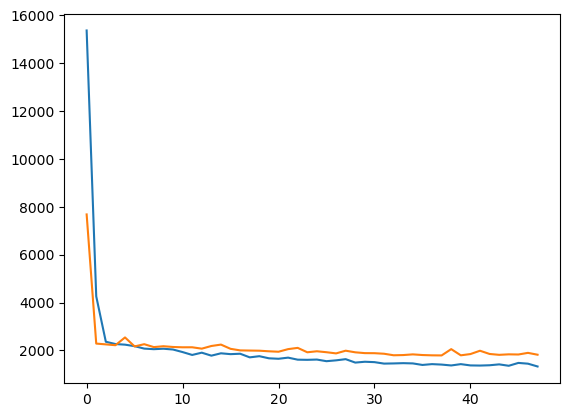

In [55]:
import matplotlib.pyplot as plt
plt.plot(tr_err)
plt.plot(ts_err)

# Training using entire data

In [56]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(Xnew,Y,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
16/16 [==============================] - 1s 12ms/step - loss: 7782.9282 - val_loss: 2320.3413
Epoch 2/250
16/16 [==============================] - 0s 3ms/step - loss: 2526.1509 - val_loss: 2754.4653
Epoch 3/250
16/16 [==============================] - 0s 3ms/step - loss: 2448.7708 - val_loss: 2113.1614
Epoch 4/250
16/16 [==============================] - 0s 3ms/step - loss: 2256.0603 - val_loss: 2581.3022
Epoch 5/250
16/16 [==============================] - 0s 3ms/step - loss: 2159.0154 - val_loss: 2324.8823
Epoch 6/250
16/16 [==============================] - 0s 3ms/step - loss: 2076.2302 - val_loss: 2035.3999
Epoch 7/250
16/16 [==============================] - 0s 3ms/step - loss: 2035.4998 - val_loss: 2333.5530
Epoch 8/250
16/16 [==============================] - 0s 3ms/step - loss: 2042.4508 - val_loss: 1998.0291
Epoch 9/250
16/16 [==============================] - 0s 3ms/step - loss: 1947.0128 - val_loss: 2271.6250
Epoch 10/250
16/16 [==============================] - 

In [57]:
final_DF = Xnewb[Xnew.columns]
pred = nn.predict(final_DF)


pred

2/2 [==============================] - 0s 3ms/step


array([[106.10508 ],
       [213.13515 ],
       [ 92.913734],
       [ 81.305305],
       [147.48282 ],
       [ 92.504974],
       [113.28671 ],
       [103.62445 ],
       [144.55573 ],
       [124.385544],
       [901.1482  ],
       [113.80741 ],
       [108.17819 ],
       [144.2062  ],
       [ 95.51999 ],
       [ 88.197   ],
       [108.140594],
       [101.344696],
       [114.804146],
       [152.78682 ],
       [194.81853 ],
       [124.650856],
       [104.80167 ],
       [147.20396 ],
       [434.63147 ],
       [151.50984 ],
       [107.88238 ],
       [ 90.763794],
       [ 77.87481 ],
       [ 89.673164],
       [129.21266 ],
       [109.96153 ],
       [101.6397  ],
       [138.46783 ],
       [116.892166],
       [119.5507  ],
       [102.85043 ],
       [139.39345 ],
       [131.4589  ],
       [122.47885 ],
       [107.19242 ],
       [143.50159 ],
       [126.170815],
       [106.398705],
       [129.64915 ],
       [114.6999  ],
       [ 83.19824 ],
       [118.2

In [58]:
N_cust["Loan_Amount"]=pred

In [59]:
N_cust

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount
0,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.00,360.0,0.0,Rural,N,106.105080
1,LP001094,Male,Yes,2,Graduate,No,12173,0,166.00,360.0,0.0,Semiurban,N,213.135147
2,LP001203,Male,No,0,Graduate,No,3150,0,176.00,360.0,0.0,Semiurban,N,92.913734
3,LP001313,Male,No,0,Graduate,No,2750,0,130.00,360.0,0.0,Urban,N,81.305305
4,LP001323,Female,Yes,2,Graduate,No,2779,3664,176.00,360.0,0.0,Semiurban,N,147.482819
5,LP001347,Female,No,0,Graduate,No,2101,1500,108.00,360.0,0.0,Rural,N,92.504974
6,LP001352,Male,Yes,0,Not Graduate,No,4700,0,135.00,360.0,0.0,Semiurban,N,113.286713
7,LP001358,Male,Yes,0,Graduate,No,3445,0,130.00,360.0,0.0,Semiurban,N,103.624451
8,LP001361,Male,Yes,0,Graduate,No,2458,5105,188.00,360.0,0.0,Rural,N,144.555725
9,LP001420,Male,Yes,3+,Graduate,No,3829,1103,163.00,360.0,0.0,Urban,N,124.385544


In [60]:
N_cust.to_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/submission_loan_NN_2.csv")

# b.)if duration is less than equal to 20 years,

# is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [61]:
B[((B.Loan_Amount_Term<=240) & (B.Loan_Status =="N"))]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
84,LP001450,Male,Yes,0,Graduate,No,4456,0,131.0,180.0,0.0,Semiurban,N
173,LP001979,Male,No,0,Graduate,No,3017,2845,159.0,180.0,0.0,Urban,N
245,LP002355,Male,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban,N
354,LP002921,Male,Yes,3+,Not Graduate,No,5316,187,158.0,180.0,0.0,Semiurban,N


# Bivariate analysis

In [62]:
Y= A["Loan_Amount_Term"]
X=A.drop(labels=["Loan_Amount_Term","Loan_Status","Loan_ID"],axis=1)

Xb=B[((B.Loan_Amount_Term<=240) & (B.Loan_Status =="N"))]


In [63]:
Xb.shape

(4, 13)

In [64]:
Xb.index=range(0,4)

In [65]:
D_cust=Xb
Xb=Xb.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)

In [66]:
from Wd8pm import catcon
cat,con=catcon(X)

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

X1b = pd.DataFrame(mm.transform(Xb[con]),columns=con)
X2b = pd.get_dummies(Xb[cat])
Xnewb = X1b.join(X2b)



In [67]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(Xnew,Y,test_size=0.2,random_state=21)


# Neural Networks

In [68]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [69]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
13/13 [==============================] - 1s 13ms/step - loss: 117661.5469 - val_loss: 91077.2969
Epoch 2/250
13/13 [==============================] - 0s 3ms/step - loss: 57776.0898 - val_loss: 18228.1660
Epoch 3/250
13/13 [==============================] - 0s 3ms/step - loss: 7442.9170 - val_loss: 1168.5350
Epoch 4/250
13/13 [==============================] - 0s 4ms/step - loss: 1822.9937 - val_loss: 1176.0433
Epoch 5/250
13/13 [==============================] - 0s 3ms/step - loss: 1781.6116 - val_loss: 1022.4355
Epoch 6/250
13/13 [==============================] - 0s 3ms/step - loss: 1648.5723 - val_loss: 1431.6771
Epoch 7/250
13/13 [==============================] - 0s 4ms/step - loss: 1674.6169 - val_loss: 877.5938
Epoch 8/250
13/13 [==============================] - 0s 3ms/step - loss: 1571.8856 - val_loss: 1690.5762
Epoch 9/250
13/13 [==============================] - 0s 3ms/step - loss: 1354.5365 - val_loss: 817.3826
Epoch 10/250
13/13 [==============================]

In [70]:
tr_err = model.history['loss']
ts_err = model.history['val_loss']

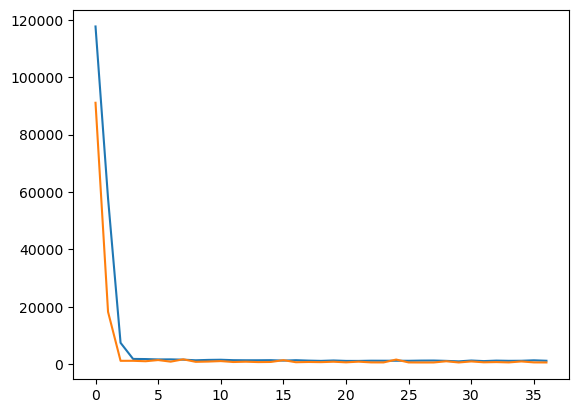

In [71]:
import matplotlib.pyplot as plt
plt.plot(tr_err)
plt.plot(ts_err)

# Training using entire data

In [72]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(Xnew,Y,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
16/16 [==============================] - 1s 11ms/step - loss: 116178.6719 - val_loss: 83947.3438
Epoch 2/250
16/16 [==============================] - 0s 3ms/step - loss: 43584.4844 - val_loss: 7010.6152
Epoch 3/250
16/16 [==============================] - 0s 3ms/step - loss: 2956.6116 - val_loss: 1363.4050
Epoch 4/250
16/16 [==============================] - 0s 3ms/step - loss: 1723.3284 - val_loss: 1077.1431
Epoch 5/250
16/16 [==============================] - 0s 3ms/step - loss: 1637.6665 - val_loss: 1352.4491
Epoch 6/250
16/16 [==============================] - 0s 3ms/step - loss: 1630.9873 - val_loss: 937.3817
Epoch 7/250
16/16 [==============================] - 0s 3ms/step - loss: 1412.7789 - val_loss: 794.4033
Epoch 8/250
16/16 [==============================] - 0s 3ms/step - loss: 1546.5569 - val_loss: 1112.9733
Epoch 9/250
16/16 [==============================] - 0s 3ms/step - loss: 1411.0049 - val_loss: 1004.7387
Epoch 10/250
16/16 [==============================] 

In [73]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [74]:
Xnewb[Xnew.columns]

KeyError: "['Gender_Female', 'Dependents_1', 'Dependents_2', 'Self_Employed_Yes', 'Property_Area_Rural'] not in index"

In [79]:
Q=['Gender_Female', 'Dependents_1', 'Dependents_2', 'Self_Employed_Yes', 'Property_Area_Rural']
for i in Q:
    Xnewb[i]=0

In [80]:
final_DF = Xnewb[Xnew.columns]

In [81]:
pred = nn.predict(final_DF)

1/1 [==============================] - 0s 43ms/step


In [82]:
pred

array([[365.23737],
       [368.04678],
       [365.8584 ],
       [366.76895]], dtype=float32)

In [83]:
D_cust["Loan_new_term"]=pred

In [84]:
D_cust

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_new_term
0,LP001450,Male,Yes,0,Graduate,No,4456,0,131.0,180.0,0.0,Semiurban,N,365.237366
1,LP001979,Male,No,0,Graduate,No,3017,2845,159.0,180.0,0.0,Urban,N,368.046783
2,LP002355,Male,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban,N,365.858398
3,LP002921,Male,Yes,3+,Not Graduate,No,5316,187,158.0,180.0,0.0,Semiurban,N,366.768951


In [85]:
D_cust.to_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/submission_loan_NN_3.csv")